<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-10-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RBF 커널 SVM 정확도: 100.00%


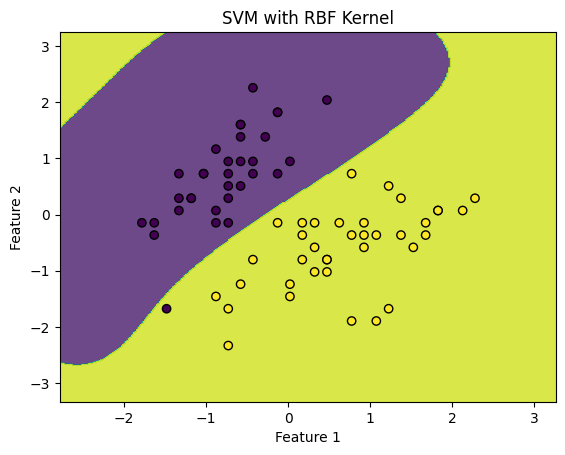

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:


# 1. 데이터 생성 (Iris 데이터셋)
X, y = datasets.load_iris(return_X_y=True)

# 2. 두 개의 클래스만 사용 (0과 1 레이블의 데이터만 사용)
X = X[y != 2]
y = y[y != 2]

# 3. 데이터 분할 (Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 데이터 스케일링 (SVM에서는 스케일링이 성능에 중요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 커널 트릭을 적용한 SVM (RBF 커널)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

# 6. 예측 및 정확도 평가
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"RBF 커널 SVM 정확도: {accuracy * 100:.2f}%")

# 7. 시각화를 위한 2차원 데이터로 변환 (처음 2개 피처만 사용)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# 8. 2D 시각화를 위한 SVM 모델 학습
svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf_2d.fit(X_train_2d, y_train)

# 9. 시각화
def plot_decision_boundary(X, y, model):
    # 그리드 설정
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 예측 결과
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 시각화
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with RBF Kernel')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train_2d, y_train, svm_rbf_2d)


In [4]:
def plot_3d_decision_boundary(X, y, model):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 그리드 설정
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                             np.linspace(y_min, y_max, 50),
                             np.linspace(z_min, z_max, 50))

    # 예측 결과
    grid = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # 3차원 결정 경계 시각화
    # Use xx[:,:,25] and yy[:,:,25] to provide 2D arrays
    ax.contourf(xx[:,:,25], yy[:,:,25], Z[:,:,25], alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('SVM with RBF Kernel - 3D')

    plt.show()

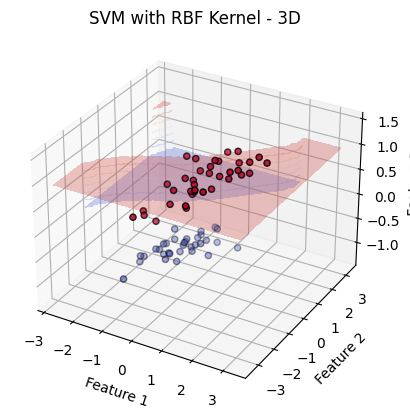

In [5]:
# 3D 결정 경계 시각화
plot_3d_decision_boundary(X_train_3d, y_train, svm_rbf_3d)